In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

[-0.26824497 -0.0986116   7.14573162 ...  2.65196236  2.72938654
  0.74143823]


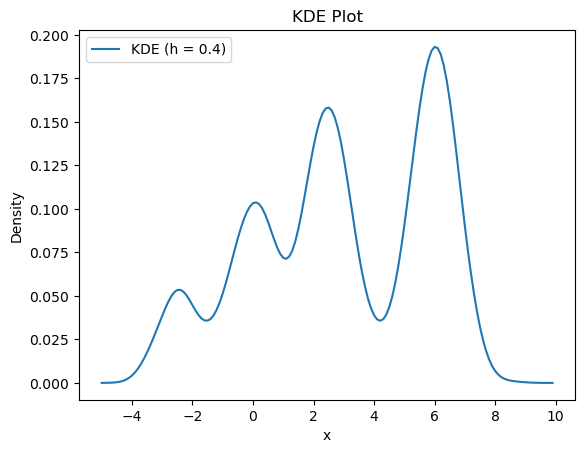

In [245]:
path1 = r"C:\Users\ncwbr\Desktop\hw1-p1.dat"
data = np.loadtxt(path1)
print(data)

def kernel(u):
    return (1.0 / np.sqrt(2.0 * np.pi)) * np.exp(- (u**2) / 2.0)

def kde(x, data, h):
    n = len(data)
    u = (x - data) / h
    return np.sum(kernel(u)) / (n * h)

x_vals = np.arange(-5, 10, 0.1)
kde_vals = [kde(x, data, h = 0.4) for x in x_vals]
plt.plot(x_vals, kde_vals, label = 'KDE (h = 0.4)')
plt.xlabel('x')
plt.ylabel('Density')
plt.title("KDE Plot")
plt.legend()
plt.show()

In [225]:
def mean_shift(x_init, data, h=0.4, T=100):
    tol = h * 10 ** -3
    x = x_init
    
    for _ in range(T):
        u = (x - data) / h           
        w = kernel(u)                   
        mx = np.sum(data * w) / np.sum(w)  
        if abs(mx - x) < tol:
            return mx 
        x = mx
    return x 

x_initial = -5.0
res = mean_shift(x_init = x_initial, data = data, h=0.4, T=100)
print("Converged point:", res)

Converged point: -2.443303599540922


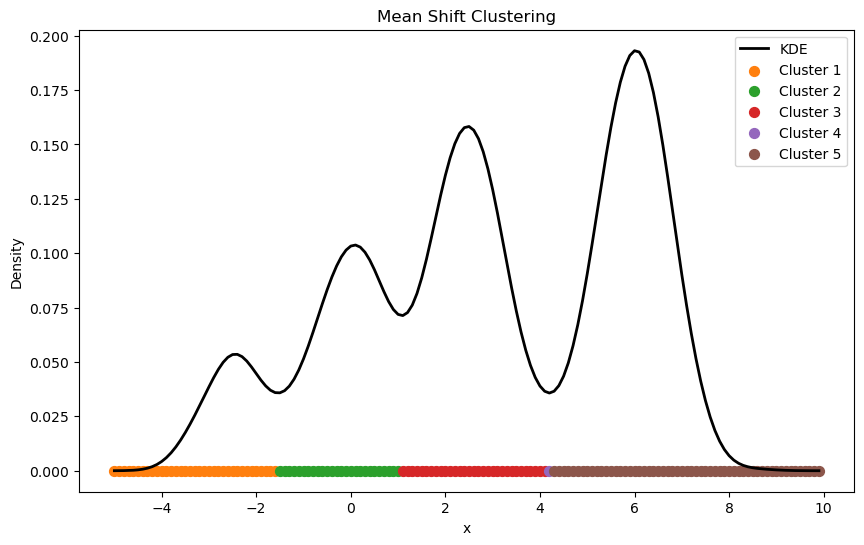

In [243]:
x_prime_vals = [mean_shift(x, data, h = 0.4, T = 100) for x in x_vals]

clusters = {}  
for point, center in zip(x_vals, x_prime_vals):
    center = round(center, 1)
    if center not in clusters:
        clusters[center] = []
    clusters[center].append(point)

cmap = plt.get_cmap('tab10')
plt.figure(figsize = (10, 6))
plt.plot(x_vals, kde_vals, color = 'black', lw = 2, label = "KDE")

label = 1
for center in sorted(clusters.keys()):
    cluster_x = np.array(clusters[center])
    plt.scatter(cluster_x, np.zeros_like(cluster_x), 
                color = cmap(label % 10), s = 50, label = f"Cluster {label}")
    label += 1

plt.xlabel("x")
plt.ylabel("Density")
plt.title("Mean Shift Clustering")
plt.legend()
plt.show()

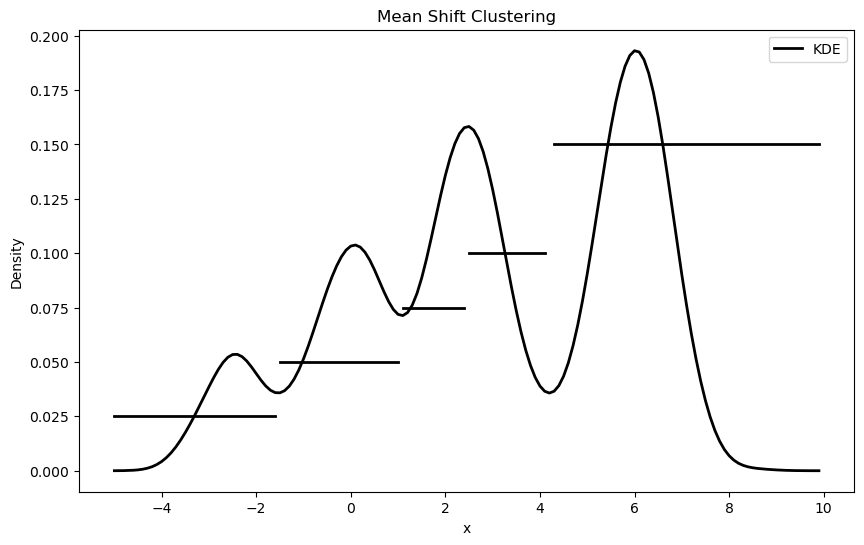

Wrote 6 clusters to 'C:\Users\ncwbr\Desktop\p1-d.out'


In [333]:
epsilon = 0.1
delta = 5 * epsilon 
y_vals = np.array(x_prime_vals) / delta

clusters = {}
for point, center in zip(x_vals, y_vals):
    center = round(center, 1)
    if center not in clusters:
        clusters[center] = []
    clusters[center].append(point)

plt.figure(figsize = (10, 6))
plt.plot(x_vals, kde_vals, color = 'black', lw = 2, label = "KDE")

ax = plt.gca()
label = 1
for center in clusters.keys():
    cluster_x = np.array(clusters[center])
    x_min, x_max = ax.get_xlim()
    norm_xmin = (min(clusters[center]) - x_min) / (x_max - x_min)
    norm_xmax = (max(clusters[center]) - x_min) / (x_max - x_min)
    plt.axhline(y = 0.025 * label, xmin = norm_xmin, xmax = norm_xmax, color = 'black', linestyle='-', linewidth=2)
    label += 1
    
plt.xlabel("x")
plt.ylabel("Density")
plt.title("Mean Shift Clustering")
plt.legend()
plt.show()

out_path = r'C:\Users\ncwbr\Desktop\p1-d.out'
with open(out_path, 'w') as f:
    for idx, center in enumerate(clusters):
        pts = clusters[center]
        listing = ",".join(f"{p:.1f}" for p in pts)
        f.write(f"cluster {idx}: {listing}\n")

print(f"Wrote {len(centers)} clusters to '{out_path}'")

In [237]:
np.random.seed(2427348)
n_prime = 25
indices = np.random.choice(len(x_vals), size = n_prime, replace = False)
x_vals = np.array(x_vals)
x_prime_vals = np.array(x_prime_vals)
x_subset = x_vals[indices]
x_prime_subset = x_prime_vals[indices]
y_subset = y_vals[indices]

clusters1 = {}
for point, center in zip(x_subset, x_prime_subset):
    center = round(center, 1)
    if center not in clusters1:
        clusters1[center] = []
    clusters1[center].append(point)

clusters2 = {}
for point, center in zip(x_subset, y_subset):
    center = round(center, 1)
    if center not in clusters2:
        clusters2[center] = []
    clusters2[center].append(point)

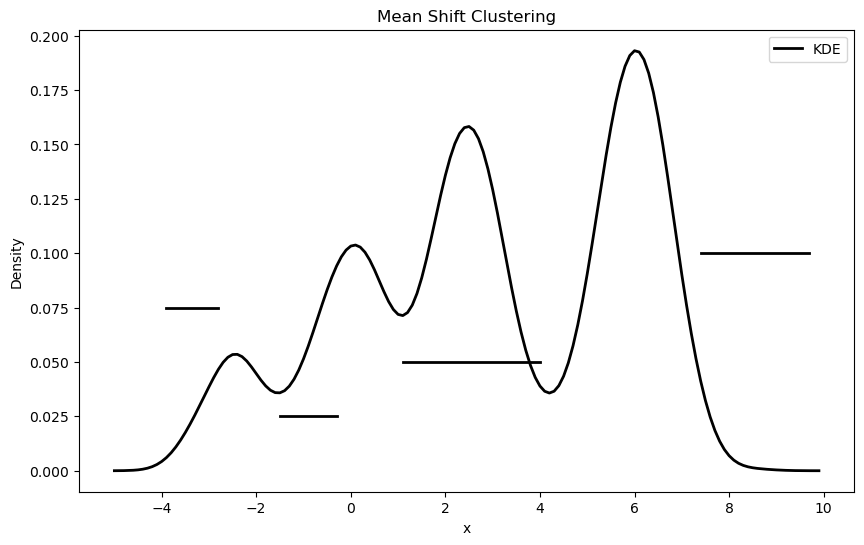

In [337]:
plt.figure(figsize = (10, 6))
plt.plot(x_vals, kde_vals, color = 'black', lw = 2, label = "KDE")

label = 1
for center in clusters1.keys():
    cluster_x = np.array(clusters1[center])
    x_min, x_max = ax.get_xlim()
    norm_xmin = (min(clusters1[center]) - x_min) / (x_max - x_min)
    norm_xmax = (max(clusters1[center]) - x_min) / (x_max - x_min)
    plt.axhline(y = 0.025 * label, xmin = norm_xmin, xmax = norm_xmax, color = 'black', linestyle='-', linewidth=2)
    label += 1
    
plt.xlabel("x")
plt.ylabel("Density")
plt.title("Mean Shift Clustering")
plt.legend()
plt.show()

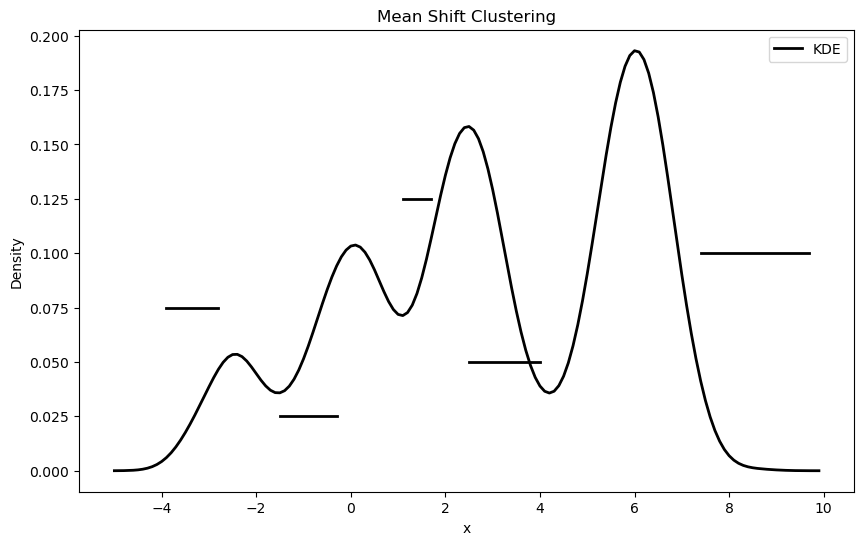

In [339]:
plt.figure(figsize = (10, 6))
plt.plot(x_vals, kde_vals, color = 'black', lw = 2, label = "KDE")

ax = plt.gca()
label = 1
for center in clusters2.keys():
    cluster_x = np.array(clusters2[center])
    x_min, x_max = ax.get_xlim()
    norm_xmin = (min(clusters2[center]) - x_min) / (x_max - x_min)
    norm_xmax = (max(clusters2[center]) - x_min) / (x_max - x_min)
    plt.axhline(y = 0.025 * label, xmin = norm_xmin, xmax = norm_xmax, color = 'black', linestyle='-', linewidth=2)
    label += 1
    
plt.xlabel("x")
plt.ylabel("Density")
plt.title("Mean Shift Clustering")
plt.legend()
plt.show()

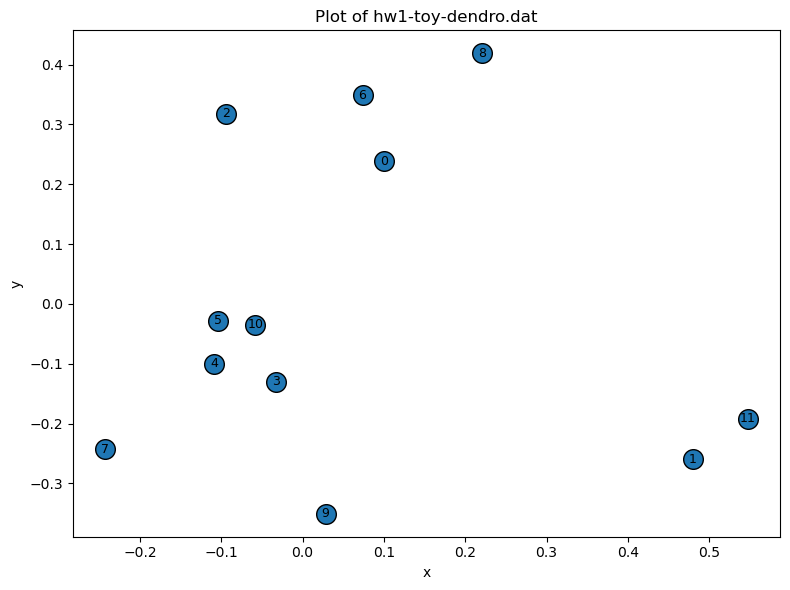

In [261]:
path2 = r"C:\Users\ncwbr\Desktop\hw1-toy-dendro.dat"
data = np.loadtxt(path2)
x      = data[:, 0]
y      = data[:, 1]
labels = data[:, 2].astype(int)

plt.figure(figsize=(8, 6))
plt.scatter(x, y, s=200, edgecolor='k')

for xi, yi, lab in zip(x, y, labels):
    plt.text(xi, yi, str(lab), 
             ha='center', va='center',
             fontsize= 9
    )

plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of hw1‑toy‑dendro.dat')
plt.tight_layout()
plt.show()

In [319]:
clusters_1 = {1: [1, 11], 2: [0, 2, 6, 8], 3: [3, 4, 5, 7, 9, 10]}
clusters_2 = {1: [1, 11], 2: [0, 2, 6, 8], 3: [3, 4, 5, 7, 10], 4: [9]}                               
k1, k2 = len(clusters_1), len(clusters_2)                  
M = [[0 for _ in range(k2)] for _ in range(k1)]

for i in range(1, k1 + 1):
    for j in range(1, k2 + 1):
        ck = set(clusters_1[i])
        ck_prime = set(clusters_2[j])
        M[i-1][j-1] = len(ck & ck_prime)

print(M)

[[2, 0, 0, 0], [0, 4, 0, 0], [0, 0, 5, 1]]


In [307]:
n = 12
X_1 = np.zeros((n, k1), dtype = int)
X_2 = np.zeros((n, k2), dtype = int)

for k, num in clusters_1.items():
    X_1[num, k-1] = 1
for k, num in clusters_2.items():
    X_2[num, k-1] = 1

In [309]:
print(X_1)

[[0 1 0]
 [1 0 0]
 [0 1 0]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 1 0]
 [0 0 1]
 [0 1 0]
 [0 0 1]
 [0 0 1]
 [1 0 0]]


In [311]:
print(X_2)

[[0 1 0 0]
 [1 0 0 0]
 [0 1 0 0]
 [0 0 1 0]
 [0 0 1 0]
 [0 0 1 0]
 [0 1 0 0]
 [0 0 1 0]
 [0 1 0 0]
 [0 0 0 1]
 [0 0 1 0]
 [1 0 0 0]]


In [313]:
print(X_1.T @ X_2)

[[2 0 0 0]
 [0 4 0 0]
 [0 0 5 1]]


In [321]:
M = np.array([
    [2, 0, 0, 0],
    [0, 4, 0, 0],
    [0, 0, 5, 1]
])
F_norm = np.sqrt(np.sum((M - X_1.T @ X_2) * (M - X_1.T @ X_2)))
print(F_norm)

0.0
